# Data Visualization for Telco Customer Churn

In [96]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
# Load dataa
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## On average, which payment method has the largest monthly charges per customer?

In [75]:
# shows each payment method and it's average monthly charge
monthly_avg = df.groupby('PaymentMethod')['MonthlyCharges'].mean().sort_values() 
monthly_avg

PaymentMethod
Mailed check                 43.917060
Credit card (automatic)      66.512385
Bank transfer (automatic)    67.192649
Electronic check             76.255814
Name: MonthlyCharges, dtype: float64

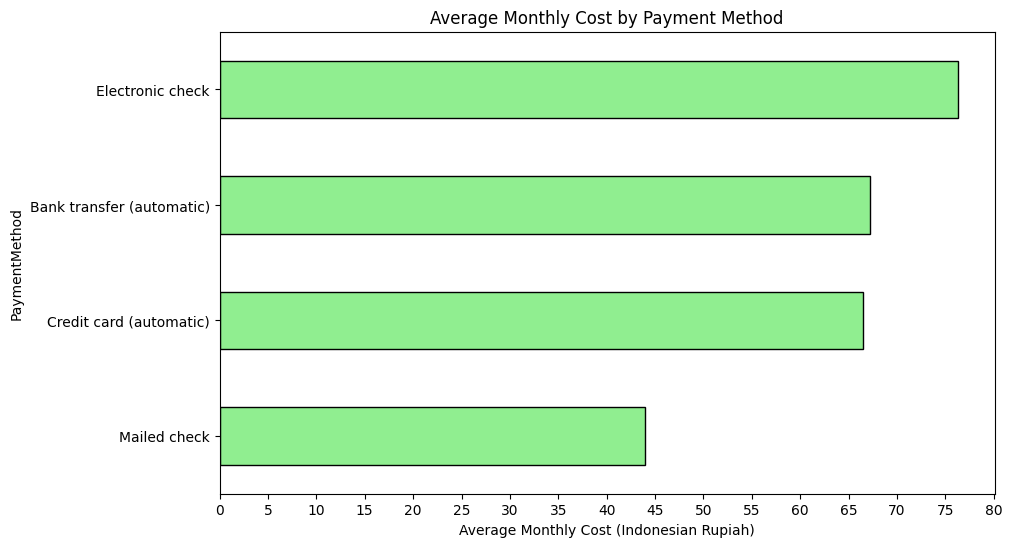

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) 

monthly_avg.plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title('Average Monthly Cost by Payment Method')
plt.xlabel('Average Monthly Cost (Indonesian Rupiah)')
#plt.ylabel('Payment Method')

#plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 85, 5))

plt.show()

The bar chart shows the average monthly cost (in Indonesian Rupiah) by payment method.

- Electronic check has the highest average monthly cost, around 78.
- Bank transfer (automatic) and Credit card (automatic) have average monthly cost, both around 66-67.
- Mailed check has the lowest average monthly cost, about 44.

Electronic check is the most expensive payment method on average, while Mailed check is the least expensive. Bank transfer and Credit card payments have moderate and similar average costs.

## How does the number of customers look at the tenure group?

Tenure group:
- low_tenure: Users with tenure < 21 months
- median tenure: Users with tenure of 21 - 40 months
- high tenure: Users with tenure > 40 months

In [77]:
# Create a copy of the original dataset to avoid modifying it directly
df2 = df.copy()
# Create a new column called 'Segment' by categorizing the 'tenure' column into bins (ranges)
df2['Segment'] = pd.cut(
    df2['tenure'],
    bins = [min(df2['tenure']), 21, 41, (max(df2['tenure'])+1)],
    labels = ['Low', 'Medium', 'High'],
    right = False
)

# Showw only the columns 'customerID', 'tenure', and the newly created 'Segment'
display(df2[['customerID', 'tenure', 'Segment']])

,customerID,tenure,Segment
0,7590-VHVEG,1,Low
1,5575-GNVDE,34,Medium
2,3668-QPYBK,2,Low
3,7795-CFOCW,45,High
4,9237-HQITU,2,Low
...,...,...,...
7038,6840-RESVB,24,Medium
7039,2234-XADUH,72,High
7040,4801-JZAZL,11,Low
7041,8361-LTMKD,4,Low


In [78]:
# Group dataset by the 'Segment' column 
df2_agg = df2.groupby('Segment', as_index = False, observed = False)['customerID'].nunique()

display(df2_agg)

,Segment,customerID
0,Low,2878
1,Medium,1408
2,High,2757


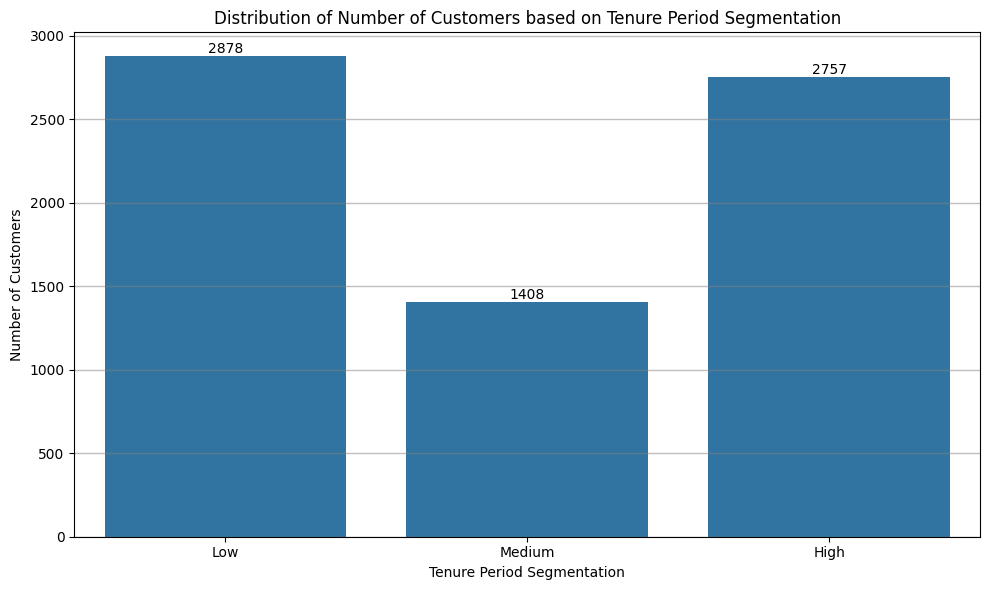

In [79]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='customerID', data=df2_agg)
plt.title('Distribution of Number of Customers based on Tenure Period Segmentation')
plt.grid(color='grey', linestyle='-', linewidth=1.0, axis='y', alpha=0.5)
plt.ylabel('Number of Customers')
plt.xlabel('Tenure Period Segmentation')
plt.xticks(rotation=0)
plt.tight_layout()

for i, value in df2_agg.iterrows():
    plt.text(i, value['customerID'], str(value['customerID']), ha='center', va='bottom')

plt.show()

The bar chart illustrates the distribution of customers based on their tenure period segmentation.

- The largest group of customers falls under the "Low" tenure period segment, with 2,878 customers.
- The "High" tenure period segment is the second largest, with 2,757 customers.
- The "Medium" tenure period segment has the fewest customers, totaling 1,408.

This suggests a polarized customer base where many are either relatively new or well-established, with fewer customers in the transitional medium tenure phase. The disparity could indicate that customers tend to either leave relatively early or remain for a long time, highlighting possible challenges or opportunities in retaining those in the mid-term period. Understanding and addressing the factors influencing this mid-tenure drop could help improve overall customer retention strategies.

## Do most Senior Citizens subscribe to PhoneService?

In [80]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [81]:
# Group data by SeniorCitizen and PhoneService
grouped_data = df.groupby(['SeniorCitizen', 'PhoneService'])['customerID'].nunique().reset_index()

# Calculate the percentage ratio
total_customers = df['customerID'].nunique()
grouped_data['Ratio'] = grouped_data['customerID'] / total_customers * 100

grouped_data

,SeniorCitizen,PhoneService,customerID,Ratio
0,0,No,578,8.206730
1,0,Yes,5323,75.578589
2,1,No,104,1.476643
3,1,Yes,1038,14.738038


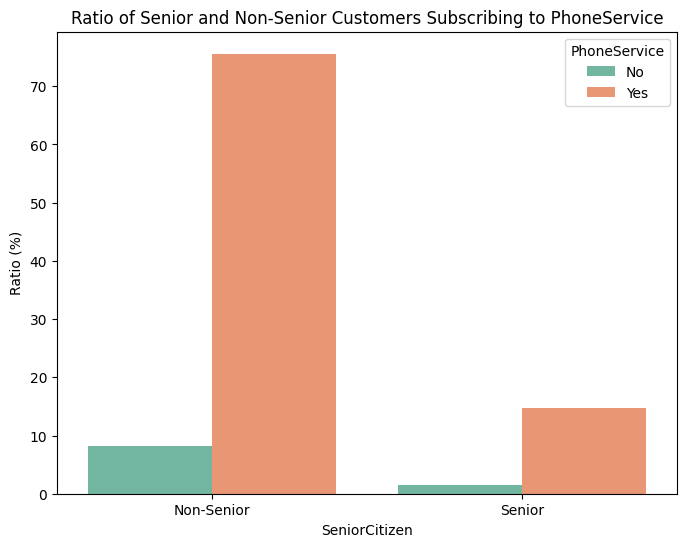

In [82]:
# Create charts with clearer colors and label adjustments
plt.figure(figsize=(8, 6))

sns.barplot(x='SeniorCitizen', y='Ratio', hue='PhoneService', data=grouped_data, palette='Set2')
plt.xticks([0, 1], ['Non-Senior', 'Senior'])

# Adding titles and labels
plt.title('Ratio of Senior and Non-Senior Customers Subscribing to PhoneService')
plt.ylabel('Ratio (%)')

plt.show()

The bar chart shows the ratio of senior and non-senior customers subscribing to PhoneService.

- A large majority of non-senior customers (about 75%) subscribe to phone service, with only around 8% not subscribing.
- Among senior customers, only about 15% subscribe to phone service, while approximately 2% do not.

This chart highlights a significant disparity in phone service subscription rates between senior and non-senior customers. Non-senior customers overwhelmingly subscribe to phone service, suggesting it is a widely used or essential service for this group. 

In contrast, a notably smaller portion of senior customers subscribe, which could point to differing communication needs, preferences, or possible barriers such as technology adoption challenges or alternative solutions preferred by seniors. 

This insight suggests potential for tailored marketing or service models aimed at increasing phone service adoption among senior customers by addressing their unique requirements or concerns.

## Are customers with high monthly charges more likely to churn?

In [83]:
telco_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# For clearer grouping, i convert 'Churn' column into categorical dtype
telco_df['Churn'] = telco_df['Churn'].astype('category')

In [84]:
telco_df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

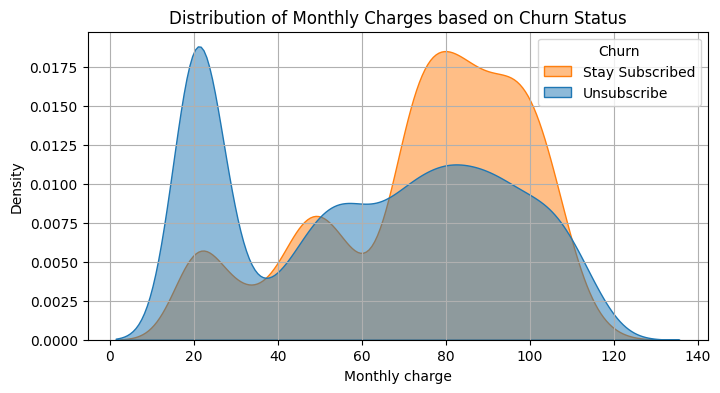

In [85]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data=telco_df, x='MonthlyCharges', hue='Churn', common_norm=False, fill=True, alpha=0.5)
plt.title('Distribution of Monthly Charges based on Churn Status')
plt.xlabel('Monthly charge')
plt.ylabel('Density')
plt.legend(title='Churn', labels=['Stay Subscribed', 'Unsubscribe'])
plt.grid()
plt.show()

**Summary:**

- Customers who unsubscribed tend to have lower monthly charges, with a noticeable peak around the $20 mark. This indicates a higher density of unsubscribing customers paying lower monthly fees.
- Customers who stayed subscribed generally have higher monthly charges, with a peak density around 80 to 100 dollars.
- There is some overlap in the range of monthly charges (40 to 100 dollars), where customers both unsubscribe and stay subscribed.
- The density of subscribers paying very low monthly charges (<$40) is much lower than those who unsubscribe in this range.

This suggests that monthly charges influence customer churn behavior. Customer with lower monthly charges, around $20, are more likely to unsubscribe, possibly due to **lower perceived value** or **less commitment**.

On the other hand, those paying higher charges, between 80-100 dollars, tend to stay subscribed, indicating greater satisfaction or engagement. 

The mixed churn patterns in the mid-range charges suggest that other factors may also affect retention. Overall, pricing and perceived value appear to be key factors in customer retention strategies.

## How does having partners and dependents affect customer churn rates?

In [86]:
telco_df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [87]:
# Redefine the conditions and status labels
conditions = [
    (telco_df['Partner'] == 'Yes') & (telco_df['Dependents'] == 'Yes'),  # Have a partner and dependents
    (telco_df['Partner'] == 'Yes') & (telco_df['Dependents'] == 'No'),   # Have a partner and no dependents
    (telco_df['Partner'] == 'No') & (telco_df['Dependents'] == 'Yes'),    # Don't have a partner, but have dependents
    (telco_df['Partner'] == 'No') & (telco_df['Dependents'] == 'No')       # Not having a partner or dependents
]

status_labels = [
    'Partner & Dependents',
    'Partner, without Dependents',
    'Without Partner, with Dependents',
    'Without Partner & Dependents'
]

# Ensures all labels in status_labels are strings
status_labels = [str(label) for label in status_labels]

# Add 'Status' column to DataFrame using np.select
telco_df['Status'] = np.select(conditions, status_labels, default='Unknown')

# Group data based on the 'Status' column, and calculate the churn rate
churn_rate = telco_df.groupby('Status')['Churn'].value_counts(normalize=True).unstack().fillna(0)

# Calculate churn percentage
churn_rate_percentage = churn_rate * 100
churn_rate_percentage

Churn,No,Yes
Status,,
Partner & Dependents,85.763293,14.236707
"Partner, without Dependents",74.591652,25.408348
Without Partner & Dependents,65.762195,34.237805
"Without Partner, with Dependents",78.670360,21.329640


**Summary:**

Having a partner and dependents seems to be the best recipe for customer loyalty, with the lowest churn rate at about 14%. <br>
When partners are involved but dependents are not, churn climbs to 25%, suggesting the absence of dependents might loosen the tie. <br>
Customers flying solo without any partners or dependents show the highest churn at 34%, highlighting that going it alone correlates with higher dropout. <br>
Interestingly, having dependents but no partner still keeps churn relatively low at around 21%, proving that dependents, more than partners, might be the real glue keeping subscribers around.

**Suggestion:**

This suggests that marketing and retention strategies should consider customers' family and social situations. Offering plans, features, or promotions that appeal to customers with dependents could improve loyalty and reduce churn. 

Additionally, tailored engagement for single customers without family ties might be necessary to prevent higher dropout rates. <br>Understanding and addressing the needs of different customer segments based on their relationship status can help the business better retain subscribers and enhance overall customer satisfaction.

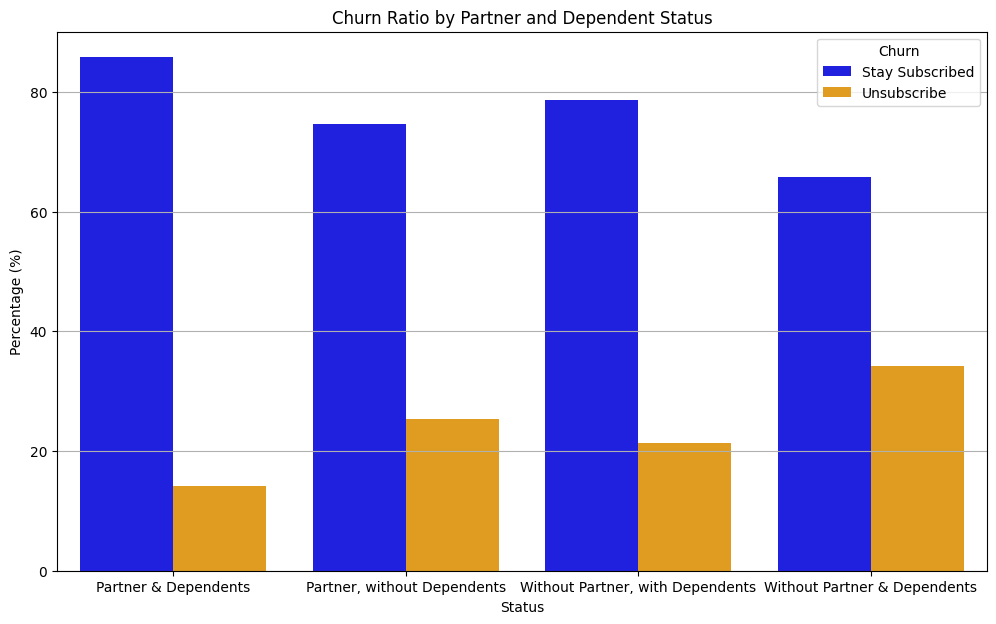

In [90]:
# Visualize churn ratio by partner and dependent status
churn_rate_percentage = churn_rate_percentage.reset_index()

# Create a bar chart for churn percentage
plt.figure(figsize=(12, 7))
sns.barplot(data=churn_rate_percentage.melt(id_vars='Status', value_vars=['No', 'Yes']),
             x='Status', y='value', hue='Churn',
             palette={'No': 'blue', 'Yes': 'orange'}, 
             order=status_labels)

plt.title('Churn Ratio by Partner and Dependent Status')
plt.xlabel('Status')
plt.ylabel('Percentage (%)')
#plt.legend(title='Churn', labels=['Stay Subscribed', 'Unsubscribe'])
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Stay Subscribed', 'Unsubscribe'], title='Churn')
plt.grid(axis='y')
plt.show()

This insight suggests opportunities to tailor marketing and retention strategies, such as promoting family-friendly plans or benefits that resonate with customers who have dependents.<br>
Meanwhile, customers without partners or dependents might require more personalized engagement or incentives to reduce their higher risk of churn. 

Overall, understanding these customer segments allows the business to focus efforts where they matter most, turning family ties into tangible retention gains.

## Let's explore insights from the Telco customer data and build a storyline using just the PaymentMethod, CustomerID, and Churn attributes.

In [111]:
# Add a 'Status' column based on the given criteria
telco_df['Status'] = np.where( 
    (telco_df['Partner'] == 'Yes') | 
    (telco_df['Dependents'] == 'Yes'), 
    'Married', 
    'Single'
)

# Displays multiple rows from an updated DataFrame
telco_df[['SeniorCitizen', 'Partner', 'Dependents', 'Status']].head()

,SeniorCitizen,Partner,Dependents,Status
0,0,Yes,No,Married
1,0,No,No,Single
2,0,No,No,Single
3,0,No,No,Single
4,0,No,No,Single


In [113]:
# Calculate number of customers and churn rate based on status
status_churn_count = telco_df.groupby(['Status', 'Churn']).size().unstack().fillna(0)
status_churn_count_percentage = (status_churn_count.div(status_churn_count.sum(axis=1), axis=0) * 100).round(2)

# Calculate average monthly charges and tenure based on status
avg_monthly_charges = telco_df.groupby('Status')['MonthlyCharges'].mean()
avg_tenure = telco_df.groupby('Status')['tenure'].mean()

status_churn_count_percentage, avg_monthly_charges, avg_tenure

C:\Users\rayya\AppData\Local\Temp\ipykernel_17056\383079022.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  status_churn_count = telco_df.groupby(['Status', 'Churn']).size().unstack().fillna(0)


(Churn       No    Yes
 Status               
 Married  80.18  19.82
 Single   65.76  34.24,
 Status
 Married    66.311440
 Single     62.983735
 Name: MonthlyCharges, dtype: float64,
 Status
 Married    40.275047
 Single     23.303354
 Name: tenure, dtype: float64)

In [114]:
import matplotlib.pyplot as plt

In [115]:
# Combine all calculated information into a DataFrame for visualization
summary_df = pd.DataFrame({
    'Status': avg_monthly_charges.index,
    'Average Monthly Charges': avg_monthly_charges.values,
    'Average Tenure': avg_tenure.values,
    'Churn Rate (%)': status_churn_count_percentage['Yes']
})

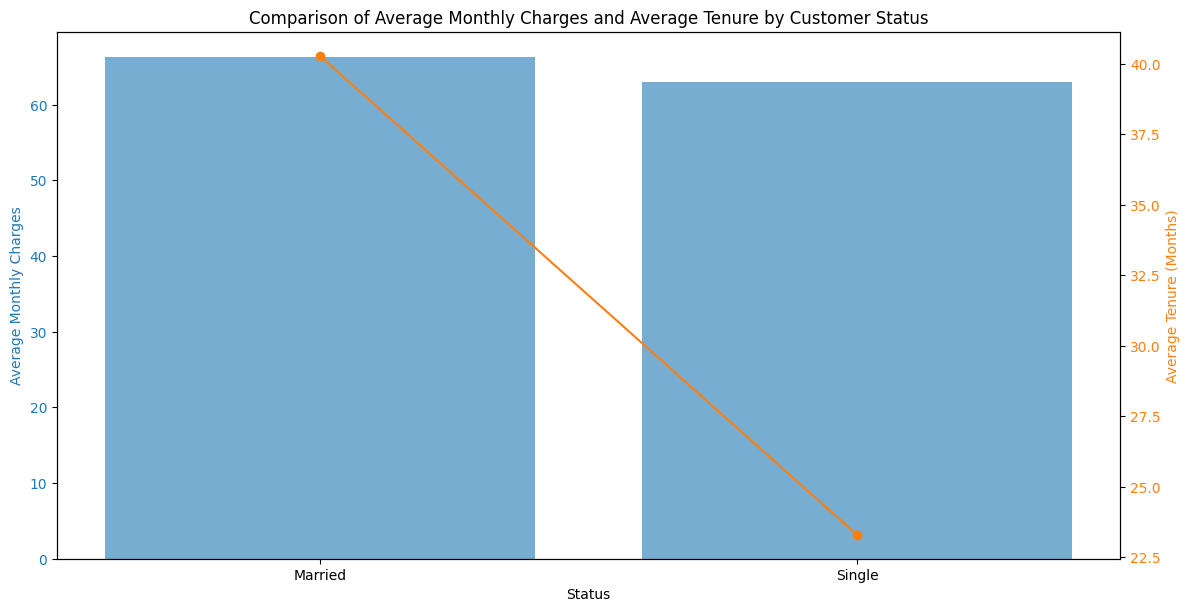

C:\Users\rayya\AppData\Local\Temp\ipykernel_17056\847043603.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x='Status', y='Churn Rate (%)', palette='rocket')


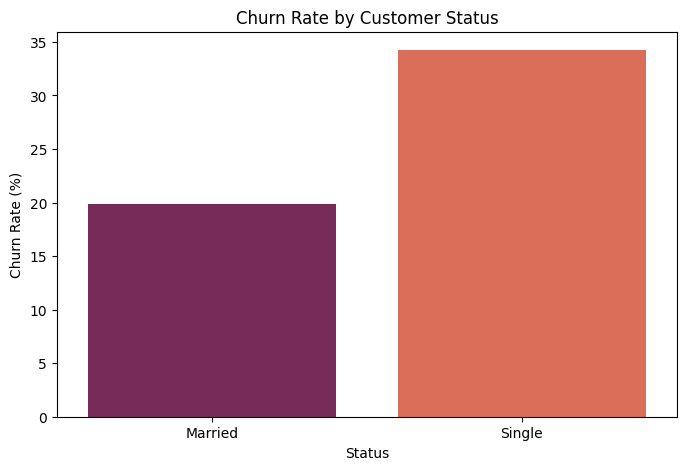

In [118]:
# Plot to compare average monthly cost and average tenure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Set up a bar plot for the average monthly cost
color = 'tab:blue'
ax1.set_xlabel('Status')
ax1.set_ylabel('Average Monthly Charges', color=color)
ax1.bar(summary_df['Status'], summary_df['Average Monthly Charges'], color=color, alpha=0.6, label='Avg Monthly Charges')
ax1.tick_params(axis='y', labelcolor=color)

# Added a second axis for average tenure
ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('Average Tenure (Months)', color=color)
ax2.plot(summary_df['Status'], summary_df['Average Tenure'], color=color, marker='o', label='Avg Tenure')
ax2.tick_params(axis='y', labelcolor=color)

# Display legend and title
fig.tight_layout()  
plt.title('Comparison of Average Monthly Charges and Average Tenure by Customer Status')
plt.show()

# Plot for churn rate
plt.figure(figsize=(8, 5))
sns.barplot(data=summary_df, x='Status', y='Churn Rate (%)', palette='rocket')
plt.title('Churn Rate by Customer Status')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Status')
plt.show()

Married customers pay slightly higher monthly charges and have a significantly longer average tenure (~40 months) compared to single customers, who pay a bit less but stay subscribed for a shorter time (~23 months).

The data suggests that married customers are more loyal, sticking around longer despite paying more, while single customers tend to churn earlier.<br> For the business, this means married customers represent more stable, long-term revenue, highlighting a potential benefit in targeting retention efforts specifically for single customers to improve their tenure and reduce churn.

The second visualized data aligns with previous insights that single customers are more likely to unsubscribe, indicating lower loyalty and shorter tenure. This reinforces the need to focus retention strategies on single customers, perhaps by addressing their unique needs or offering targeted incentives, to reduce their higher risk of churn and improve overall customer retention.